In [ ]:
!pip install fancyimpute


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 7.3 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=de8acff0f8d66b04b5cd8e76d6059a44aa18a62631e98e8ffdfe626a173c7a6f
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=1021fe596eb53e5ab3ec6a6cbb0951addeb7eed05b67159b9e1839c9ece27bff
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
target = iris.target

# Introduce MNAR missing values
np.random.seed(42)
data.loc[data['sepal length (cm)'] > 5.0, 'sepal length (cm)'] = np.nan  # MNAR missing values in 'sepal length (cm)' column

# Display the first few rows of the dataset with missing values
print("Data with missing values:")
data.head()



Data with missing values:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,NaN,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Baseline - drop rows with nan values

In [ ]:
# Drop rows with missing values
d = data.dropna()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(d, target[d.index], test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8571428571428571


# Question 1.2 - complete your code here

In [ ]:
import fancyimpute
from fancyimpute import KNN, IterativeImputer, SimpleFill

'''
Select three methods (of your choice, even if they were not covered in class) to impute the missing values
Impute the missing values using the selected methods and report the accuracy. Explain the results you got
'''

#TODO: impute missing values - you can use the data imputation methods from here: https://anaconda.org/brittainhard/fancyimpute
# 1. K-Nearest Neighbors (KNN)
data_knn = data.copy()
data_knn.iloc[:, :] = KNN(k=5).fit_transform(data_knn)

# 2. Iterative Imputer (Multivariate Feature Imputation)
data_iterative = data.copy()
data_iterative.iloc[:, :] = IterativeImputer(max_iter=10, random_state=42).fit_transform(data_iterative)

# 3. Mean Imputation (Simple Fill)
data_mean = data.copy()
data_mean.iloc[:, :] = SimpleFill("mean").fit_transform(data_mean)

# Evaluate each imputation method
methods = {"KNN": data_knn, "Iterative Imputer": data_iterative, "Mean Imputation": data_mean}
for method_name, imputed_data in methods.items():
  #!!!from here - not our code!!!
  # Split the dataset into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(imputed_data, target, test_size=0.2, random_state=42)

  # Train a logistic regression model
  model = LogisticRegression(max_iter=200)
  model.fit(X_train, y_train)

  # Predict on the test set
  y_pred = model.predict(X_test)

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  ###print(f"Accuracy: {accuracy}")
  print(f"Accuracy using {method_name}: {accuracy}")

Imputing row 1/150 with 1 missing, elapsed time: 0.014
Imputing row 101/150 with 1 missing, elapsed time: 0.017
Accuracy using KNN: 1.0
Accuracy using Iterative Imputer: 1.0
Accuracy using Mean Imputation: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from fancyimpute import KNN, IterativeImputer, SimpleFill

# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(url)

# Select relevant features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
titanic = titanic[features + ['Survived']]

# Encode categorical feature
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})

# Introduce missing values (simulate MNAR)
np.random.seed(42)
titanic.loc[titanic['Age'] > 30, 'Age'] = np.nan

# Split into features and target
data = titanic.drop(columns=['Survived'])
target = titanic['Survived']

# Impute missing values with three methods
methods = {
    "KNN": KNN(k=5).fit_transform(data.copy()),
    "Iterative Imputer": IterativeImputer(max_iter=10, random_state=42).fit_transform(data.copy()),
    "Mean Imputation": SimpleFill("mean").fit_transform(data.copy())
}

# Evaluate each method
for method_name, imputed_data in methods.items():
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(imputed_data, target, test_size=0.2, random_state=42)

    # Train a logistic regression model
    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy using {method_name}: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/891 with 0 missing, elapsed time: 0.129
Imputing row 101/891 with 0 missing, elapsed time: 0.132
Imputing row 201/891 with 0 missing, elapsed time: 0.134
Imputing row 301/891 with 1 missing, elapsed time: 0.136
Imputing row 401/891 with 1 missing, elapsed time: 0.138
Imputing row 501/891 with 0 missing, elapsed time: 0.140
Imputing row 601/891 with 0 missing, elapsed time: 0.142
Imputing row 701/891 with 0 missing, elapsed time: 0.144
Imputing row 801/891 with 1 missing, elapsed time: 0.147
Accuracy using KNN: 0.7821229050279329
Accuracy using Iterative Imputer: 0.7877094972067039
Accuracy using Mean Imputation: 0.8044692737430168


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


# Question 1.3 - Our code

In [ ]:
# Function to introduce MCAR missing values
def introduce_mcar(data, missing_fraction, random_state=42):
    np.random.seed(random_state)
    data_mcar = data.copy()
    for col in data_mcar.columns:
        missing_indices = np.random.choice(data_mcar.index, size=int(len(data_mcar) * missing_fraction), replace=False)
        data_mcar.loc[missing_indices, col] = np.nan
    return data_mcar

# Modify Iris dataset
iris_mcar = introduce_mcar(data, missing_fraction=0.1)  # 10% MCAR missing values

# Modify Titanic dataset
titanic_mcar = introduce_mcar(data, missing_fraction=0.1)

# Imputation and evaluation for both datasets
datasets = {
    "Iris": (iris_mcar, target),
    "Titanic": (titanic_mcar, titanic['Survived'])
}

for dataset_name, (data_mcar, target) in datasets.items():
    print(f"\nResults for {dataset_name} Dataset with MCAR Missing Values:")
    methods = {
        "KNN": KNN(k=5).fit_transform(data_mcar.copy()),
        "Iterative Imputer": IterativeImputer(max_iter=10, random_state=42).fit_transform(data_mcar.copy()),
        "Mean Imputation": SimpleFill("mean").fit_transform(data_mcar.copy())
    }
    for method_name, imputed_data in methods.items():
        # Split the dataset
        X_train, X_test, y_train, y_test = train_test_split(imputed_data, target, test_size=0.2, random_state=42)

        # Train a logistic regression model
        model = LogisticRegression(max_iter=200)
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Evaluate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Dataset: {dataset_name}, Method: {method_name}, Accuracy: {accuracy}")



Results for Iris Dataset with MCAR Missing Values:


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/891 with 0 missing, elapsed time: 0.549
Imputing row 101/891 with 0 missing, elapsed time: 0.555
Imputing row 201/891 with 1 missing, elapsed time: 0.562
Imputing row 301/891 with 3 missing, elapsed time: 0.572
Imputing row 401/891 with 1 missing, elapsed time: 0.578
Imputing row 501/891 with 0 missing, elapsed time: 0.586
Imputing row 601/891 with 0 missing, elapsed time: 0.601
Imputing row 701/891 with 1 missing, elapsed time: 0.605
Imputing row 801/891 with 2 missing, elapsed time: 0.611


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Dataset: Iris, Method: KNN, Accuracy: 0.7821229050279329
Dataset: Iris, Method: Iterative Imputer, Accuracy: 0.7653631284916201
Dataset: Iris, Method: Mean Imputation, Accuracy: 0.7541899441340782

Results for Titanic Dataset with MCAR Missing Values:


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/891 with 0 missing, elapsed time: 0.573
Imputing row 101/891 with 0 missing, elapsed time: 0.587
Imputing row 201/891 with 1 missing, elapsed time: 0.592
Imputing row 301/891 with 3 missing, elapsed time: 0.596
Imputing row 401/891 with 1 missing, elapsed time: 0.600
Imputing row 501/891 with 0 missing, elapsed time: 0.605
Imputing row 601/891 with 0 missing, elapsed time: 0.609
Imputing row 701/891 with 1 missing, elapsed time: 0.613
Imputing row 801/891 with 2 missing, elapsed time: 0.617


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Dataset: Titanic, Method: KNN, Accuracy: 0.7821229050279329
Dataset: Titanic, Method: Iterative Imputer, Accuracy: 0.7653631284916201
Dataset: Titanic, Method: Mean Imputation, Accuracy: 0.7541899441340782


# Question 3.1(a.1)

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Create a DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

#TODO:
'''
Add your code here:
Create duplicates for only one class of your choice.
Vary the percentage of duplicates and report the effect on accuracy for each class.
'''

# Simulate duplicates by appending duplicate rows
df_with_duplicates = pd.concat([df, df], ignore_index=True)

# Split the data into training and test sets
X_train_dup, X_test, y_train_dup, y_test = train_test_split(df_with_duplicates[feature_names], df_with_duplicates['target'], test_size=0.3, random_state=42)
X_train, X_test_clean, y_train, y_test_clean = train_test_split(df[feature_names], df['target'], test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_dup = scaler.fit_transform(X_train_dup)
X_test = scaler.transform(X_test)
X_train = scaler.fit_transform(X_train)
X_test_clean = scaler.transform(X_test_clean)

# Train and evaluate model on dataset with duplicates
model_dup = LogisticRegression(max_iter=200)
model_dup.fit(X_train_dup, y_train_dup)
y_pred_dup = model_dup.predict(X_test)

# Train and evaluate model on dataset without duplicates
model_clean = LogisticRegression(max_iter=200)
model_clean.fit(X_train, y_train)
y_pred_clean = model_clean.predict(X_test_clean)

# Metrics calculation
print("With Duplicates:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dup):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_dup, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_dup, average='weighted'):.2f}")
print("\nClass-wise Accuracy:")
class_accuracy_dup = classification_report(y_test, y_pred_dup, target_names=target_names, output_dict=True)
for class_name, metrics in class_accuracy_dup.items():
    if class_name in target_names:
        print(f"{class_name} Accuracy: {metrics['precision']:.2f}")

print("\nWithout Duplicates:")
print(f"Accuracy: {accuracy_score(y_test_clean, y_pred_clean):.2f}")
print(f"Precision: {precision_score(y_test_clean, y_pred_clean, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test_clean, y_pred_clean, average='weighted'):.2f}")
print("\nClass-wise Accuracy:")
class_accuracy_clean = classification_report(y_test_clean, y_pred_clean, target_names=target_names, output_dict=True)
for class_name, metrics in class_accuracy_clean.items():
    if class_name in target_names:
        print(f"{class_name} Accuracy: {metrics['precision']:.2f}")


With Duplicates:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98

Class-wise Accuracy:
setosa Accuracy: 1.00
versicolor Accuracy: 1.00
virginica Accuracy: 0.92

Without Duplicates:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Class-wise Accuracy:
setosa Accuracy: 1.00
versicolor Accuracy: 1.00
virginica Accuracy: 1.00


# Question 3.1(a.2)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Load the Wine Quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=";")

# Separate features and target
X = data.drop(columns=["quality"])
y = data["quality"]

# Create a DataFrame
df = pd.DataFrame(X)
df['target'] = y

# Simulate duplicates by appending duplicate rows
df_with_duplicates = pd.concat([df, df], ignore_index=True)

# Split the data into training and test sets
X_train_dup, X_test, y_train_dup, y_test = train_test_split(
    df_with_duplicates.drop(columns=['target']), df_with_duplicates['target'],
    test_size=0.3, random_state=42, stratify=df_with_duplicates['target']
)
X_train, X_test_clean, y_train, y_test_clean = train_test_split(
    df.drop(columns=['target']), df['target'],
    test_size=0.3, random_state=42, stratify=df['target']
)

# Standardize the features
scaler = StandardScaler()
X_train_dup = scaler.fit_transform(X_train_dup)
X_test = scaler.transform(X_test)
X_train = scaler.fit_transform(X_train)
X_test_clean = scaler.transform(X_test_clean)

# Train and evaluate model on dataset with duplicates
model_dup = LogisticRegression(max_iter=200, random_state=42)
model_dup.fit(X_train_dup, y_train_dup)
y_pred_dup = model_dup.predict(X_test)

# Train and evaluate model on dataset without duplicates
model_clean = LogisticRegression(max_iter=200, random_state=42)
model_clean.fit(X_train, y_train)
y_pred_clean = model_clean.predict(X_test_clean)

# Metrics calculation
print("With Duplicates:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dup):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_dup, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_dup, average='weighted'):.2f}")
print("\nClass-wise Accuracy:")
class_accuracy_dup = classification_report(y_test, y_pred_dup, output_dict=True)
for class_name, metrics in class_accuracy_dup.items():
    if class_name.isdigit():  # Filter class metrics
        print(f"Class {class_name} Accuracy: {metrics['precision']:.2f}")

print("\nWithout Duplicates:")
print(f"Accuracy: {accuracy_score(y_test_clean, y_pred_clean):.2f}")
print(f"Precision: {precision_score(y_test_clean, y_pred_clean, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test_clean, y_pred_clean, average='weighted'):.2f}")
print("\nClass-wise Accuracy:")
class_accuracy_clean = classification_report(y_test_clean, y_pred_clean, output_dict=True)
for class_name, metrics in class_accuracy_clean.items():
    if class_name.isdigit():  # Filter class metrics
        print(f"Class {class_name} Accuracy: {metrics['precision']:.2f}")


With Duplicates:
Accuracy: 0.60
Precision: 0.59
Recall: 0.60

Class-wise Accuracy:
Class 3 Accuracy: 0.00
Class 4 Accuracy: 0.67
Class 5 Accuracy: 0.67
Class 6 Accuracy: 0.55
Class 7 Accuracy: 0.52
Class 8 Accuracy: 0.00

Without Duplicates:
Accuracy: 0.60
Precision: 0.58
Recall: 0.60

Class-wise Accuracy:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Class 3 Accuracy: 0.00
Class 4 Accuracy: 0.00
Class 5 Accuracy: 0.66
Class 6 Accuracy: 0.55
Class 7 Accuracy: 0.67
Class 8 Accuracy: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Question 3.1(b)

In [ ]:
# NEW SECTION: Analyze the effect of duplicates for a specific class on both datasets
# Function to create duplicates for a specific class
def create_class_duplicates(df, target_col, class_label, duplicate_percentage):
    class_rows = df[df[target_col] == class_label]
    num_duplicates = int(len(class_rows) * duplicate_percentage)
    duplicated_rows = pd.concat([class_rows] * num_duplicates, ignore_index=True)
    return pd.concat([df, duplicated_rows], ignore_index=True)

# Experiment with the Iris dataset
print("\n--- Experiment with Iris Dataset ---")

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Create a DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

class_to_duplicate_iris = 0  # Duplicate the 'setosa' class
duplicate_percentages = [0.5, 1.0, 2.0]

for perc in duplicate_percentages:
    print(f"\nDuplicate Percentage: {int(perc * 100)}% for Class {class_to_duplicate_iris}")
    df_with_duplicates_iris = create_class_duplicates(df, 'target', class_to_duplicate_iris, perc)
    X_train_dup, X_test, y_train_dup, y_test = train_test_split(
        df_with_duplicates_iris[feature_names], df_with_duplicates_iris['target'],
        test_size=0.3, random_state=42
    )
    scaler = StandardScaler()
    X_train_dup = scaler.fit_transform(X_train_dup)
    X_test = scaler.transform(X_test)
    model_dup = LogisticRegression(max_iter=200, random_state=42)
    model_dup.fit(X_train_dup, y_train_dup)
    y_pred_dup = model_dup.predict(X_test)

    # Print metrics
    print(f"Accuracy: {accuracy_score(y_test, y_pred_dup):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred_dup, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred_dup, average='weighted'):.2f}")
    print("\nClass-wise Accuracy:")
    class_accuracy_dup = classification_report(y_test, y_pred_dup, target_names=target_names, output_dict=True)
    for class_name, metrics in class_accuracy_dup.items():
        if class_name in target_names:
            print(f"{class_name} Accuracy: {metrics['precision']:.2f}")

# Experiment with the Wine Quality dataset
print("\n--- Experiment with Wine Quality Dataset ---")
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, sep=";")
wine_features = wine_data.drop(columns=["quality"])
wine_target = wine_data["quality"]
wine_df = wine_features.copy()
wine_df['target'] = wine_target
class_to_duplicate_wine = 5  # Duplicate the class '5'

for perc in duplicate_percentages:
    print(f"\nDuplicate Percentage: {int(perc * 100)}% for Class {class_to_duplicate_wine}")
    df_with_duplicates_wine = create_class_duplicates(wine_df, 'target', class_to_duplicate_wine, perc)
    X_train_dup, X_test, y_train_dup, y_test = train_test_split(
        df_with_duplicates_wine[wine_features.columns], df_with_duplicates_wine['target'],
        test_size=0.3, random_state=42, stratify=df_with_duplicates_wine['target']
    )
    scaler = StandardScaler()
    X_train_dup = scaler.fit_transform(X_train_dup)
    X_test = scaler.transform(X_test)
    model_dup = LogisticRegression(max_iter=200, random_state=42)
    model_dup.fit(X_train_dup, y_train_dup)
    y_pred_dup = model_dup.predict(X_test)

    # Print metrics
    print(f"Accuracy: {accuracy_score(y_test, y_pred_dup):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred_dup, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred_dup, average='weighted'):.2f}")
    print("\nClass-wise Accuracy:")
    class_accuracy_dup = classification_report(y_test, y_pred_dup, zero_division=0, output_dict=True)
    for class_name, metrics in class_accuracy_dup.items():
        if isinstance(class_name, str) and class_name.isdigit():
            print(f"Class {class_name} Accuracy: {metrics['precision']:.2f}")



--- Experiment with Iris Dataset ---

Duplicate Percentage: 50% for Class 0
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Class-wise Accuracy:
setosa Accuracy: 1.00
versicolor Accuracy: 1.00
virginica Accuracy: 0.93

Duplicate Percentage: 100% for Class 0
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Class-wise Accuracy:
setosa Accuracy: 1.00
versicolor Accuracy: 1.00
virginica Accuracy: 0.93

Duplicate Percentage: 200% for Class 0
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Class-wise Accuracy:
setosa Accuracy: 1.00
versicolor Accuracy: 1.00
virginica Accuracy: 0.93

--- Experiment with Wine Quality Dataset ---

Duplicate Percentage: 50% for Class 5
Accuracy: 1.00
Precision: 0.99
Recall: 1.00

Class-wise Accuracy:
Class 3 Accuracy: 0.00
Class 4 Accuracy: 0.00
Class 5 Accuracy: 1.00
Class 6 Accuracy: 0.00
Class 7 Accuracy: 0.67
Class 8 Accuracy: 0.00

Duplicate Percentage: 100% for Class 5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Class-wise Accuracy:
Class 3 Accuracy: 0.00
Class 4 Accuracy: 0.00
Class 5 Accuracy: 1.00
Class 6 Accuracy: 0.00
Class 7 Accuracy: 0.00
Class 8 Accuracy: 0.00

Duplicate Percentage: 200% for Class 5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Class-wise Accuracy:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Class 3 Accuracy: 0.00
Class 4 Accuracy: 0.00
Class 5 Accuracy: 1.00
Class 6 Accuracy: 0.00
Class 7 Accuracy: 0.00
Class 8 Accuracy: 0.00


# Question 3.2
#### Add your code here. You can use pandas and the dowhy python packges to generate synthetic data and evaluate the ATE

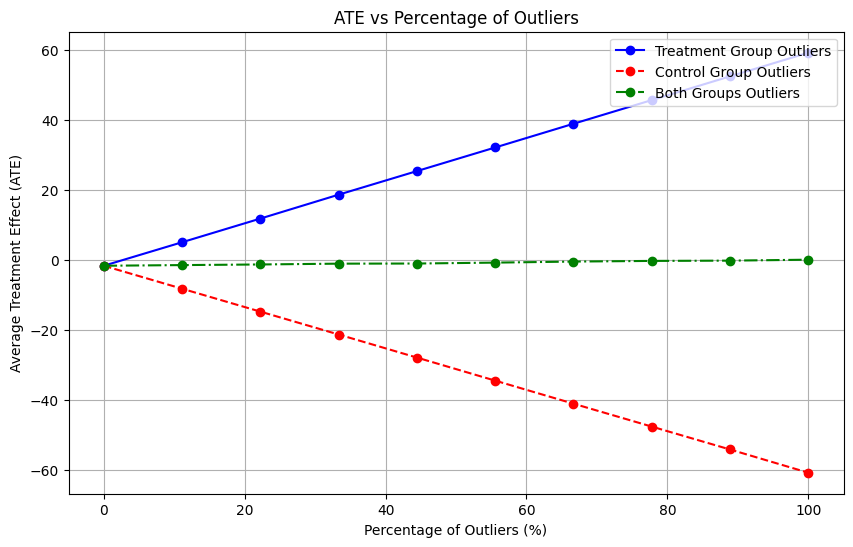

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

# Step 1: Generate Synthetic Data
np.random.seed(42)
n = 5000  # Number of observations

# Generate Age (normally distributed)
age = np.random.normal(loc=50, scale=10, size=n) #mean - 50,  standard deviation - 10

# Generate Treatment (binary, dependent on Age using logistic regression)
# The probability of receiving Treatment increases with Age
age_reshaped = age.reshape(-1, 1)
logistic_model = LogisticRegression()
logistic_model.fit(age_reshaped, (age > 50).astype(int))
treatment_prob = logistic_model.predict_proba(age_reshaped)[:, 1]
treatment = (np.random.rand(n) < treatment_prob).astype(int)

# Generate Blood Pressure (dependent on Age and Treatment with noise)
# The blood_pressure represents linear combination of the variables age and treatment, plus a constant baseline (120) and random noise (noise).
noise = np.random.normal(0, 5, size=n)
blood_pressure = 120 + 0.5 * age - 10 * treatment + noise

# Create DataFrame
data = pd.DataFrame({'Age': age, 'Treatment': treatment, 'BloodPressure': blood_pressure})

# Step 2: Add Outliers
def add_outliers(data, column, group_col, group_value, percentage, extreme_value):
    """Add outliers to a specific column for a given group."""
    group_indices = data[data[group_col] == group_value].index
    num_outliers = int(len(group_indices) * percentage)
    outlier_indices = np.random.choice(group_indices, num_outliers, replace=False)
    data.loc[outlier_indices, column] = extreme_value

# Add outliers to the Blood Pressure variable for the Treatment, Control, or Both Groups
percentages = np.linspace(0, 1, 10)  # Outlier percentages (0% to 100%)
ate_values_treatment = []
ate_values_control = []
ate_values_both = []

for perc in percentages:
    # Case 1: Outliers in the treatment group
    data_with_outliers_treatment = data.copy()
    add_outliers(data_with_outliers_treatment, 'BloodPressure', 'Treatment', 1, perc, extreme_value=200)
    treated = data_with_outliers_treatment[data_with_outliers_treatment['Treatment'] == 1]['BloodPressure']
    control = data_with_outliers_treatment[data_with_outliers_treatment['Treatment'] == 0]['BloodPressure']
    ate_treatment = treated.mean() - control.mean()
    ate_values_treatment.append(ate_treatment)

    # Case 2: Outliers in the control group
    data_with_outliers_control = data.copy()
    add_outliers(data_with_outliers_control, 'BloodPressure', 'Treatment', 0, perc, extreme_value=200)
    treated = data_with_outliers_control[data_with_outliers_control['Treatment'] == 1]['BloodPressure']
    control = data_with_outliers_control[data_with_outliers_control['Treatment'] == 0]['BloodPressure']
    ate_control = treated.mean() - control.mean()
    ate_values_control.append(ate_control)

    # Case 3: Outliers in both groups
    data_with_outliers_both = data.copy()
    add_outliers(data_with_outliers_both, 'BloodPressure', 'Treatment', 1, perc, extreme_value=200)
    add_outliers(data_with_outliers_both, 'BloodPressure', 'Treatment', 0, perc, extreme_value=200)
    treated = data_with_outliers_both[data_with_outliers_both['Treatment'] == 1]['BloodPressure']
    control = data_with_outliers_both[data_with_outliers_both['Treatment'] == 0]['BloodPressure']
    ate_both = treated.mean() - control.mean()
    ate_values_both.append(ate_both)

# Step 3: Plot Results
plt.figure(figsize=(10, 6))
plt.plot(percentages * 100, ate_values_treatment, marker='o', linestyle='-', color='b', label='Treatment Group Outliers')
plt.plot(percentages * 100, ate_values_control, marker='o', linestyle='--', color='r', label='Control Group Outliers')
plt.plot(percentages * 100, ate_values_both, marker='o', linestyle='-.', color='g', label='Both Groups Outliers')
plt.xlabel('Percentage of Outliers (%)')
plt.ylabel('Average Treatment Effect (ATE)')
plt.title('ATE vs Percentage of Outliers')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()


# Question 3.2 - example

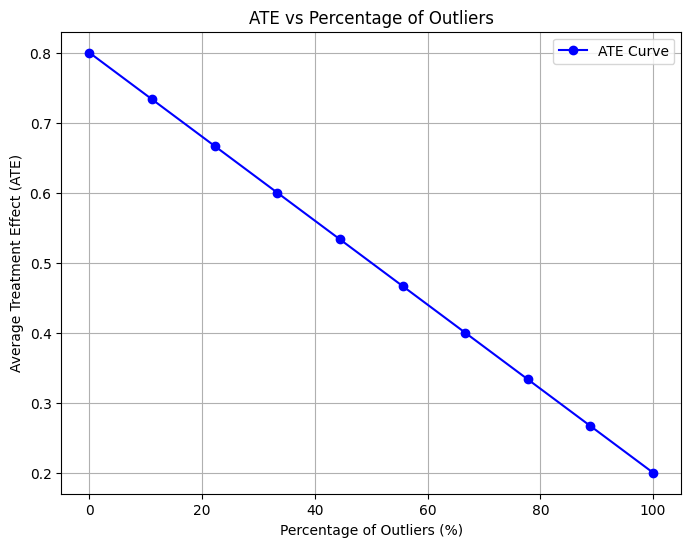

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
outliers = np.linspace(0, 100, 10)  # Percentage of outliers (0% to 100%)
ate = np.linspace(0.8, 0.2, 10)     # Example ATE values decreasing

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(outliers, ate, marker='o', linestyle='-', color='b', label='ATE Curve')

# Add labels and title
plt.xlabel('Percentage of Outliers (%)')
plt.ylabel('Average Treatment Effect (ATE)')
plt.title('ATE vs Percentage of Outliers')

# Add grid and legend
plt.grid(True)
plt.legend(loc='upper right')

# Show the plot
plt.show()
